Instalação dos módulos via pip

In [2]:
pip install sklearn matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


Chamada das bibliotecas necessárias

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

Construção do dataframe com base nos arquivos CSV

In [ ]:
data = {}

data[0] = pd.read_csv('../Databases/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
data[1]= pd.read_csv('../Databases/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data[2] = pd.read_csv('../Databases/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data[3] = pd.read_csv('../Databases/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
data[4] = pd.read_csv('../Databases/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data[5] = pd.read_csv('../Databases/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data[6] = pd.read_csv('../Databases/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
data[7] = pd.read_csv('../Databases/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')

controle = dataframe = pd.concat(data)

# Dropping the CUST_ID column from the data
dataframe = dataframe.drop(' Label', axis = 1)
  
# Handling the missing values
dataframe.fillna(method ='ffill', inplace = True)

Função para limpar o dataset

In [5]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

### Principal Components Analysis (PCA)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
dataframe = clean_dataset(dataframe)

In [8]:
pca = PCA (n_components = 2)

In [9]:
pca.fit (dataframe)
pca.components_
kmeans_preparated = pca.transform(dataframe)

In [10]:
dataX = []
dataY = []
for item in kmeans_preparated:
    dataX.append(item[0])
    dataY.append(item[1])

In [11]:
print(dataX[0:10])
print(dataY[0:10])

[-30865664.138760045, -30826428.04871683, -30827684.378646288, -30828924.567160614, -30865664.138696816, -30823825.29802385, -30855597.49774878, -30828243.77341129, -30855595.92663672, -30917679.454349753]
[-2610465.738027461, -2548130.5976338573, -2550062.5711792354, -2552018.239118669, -2610465.738083871, -2546601.7047146894, -2594441.4760417063, -2550942.1866174564, -2594440.526536394, -2694146.474721737]


### Kmeans clustering

In [12]:
from pandas import DataFrame
Data = {'x': dataX,
        'y': dataY
       }

df = DataFrame(Data,columns=['x','y'])

In [13]:
print(df)

                    x             y
0       -3.086566e+07 -2.610466e+06
1       -3.082643e+07 -2.548131e+06
2       -3.082768e+07 -2.550063e+06
3       -3.082892e+07 -2.552018e+06
4       -3.086566e+07 -2.610466e+06
...               ...           ...
2827871 -3.077420e+07 -2.548007e+06
2827872 -3.083878e+07 -2.568404e+06
2827873 -3.082984e+07 -2.553585e+06
2827874 -2.917904e+07 -2.558580e+06
2827875 -3.069562e+07 -2.544341e+06

[2827876 rows x 2 columns]


[[-3.04980237e+07 -2.49468312e+06]
 [ 1.78982223e+08 -7.47881584e+07]
 [ 1.20293067e+08  1.23173943e+08]
 [ 1.76462575e+08 -2.37795280e+07]
 [ 6.62985722e+07 -1.19137352e+07]
 [ 2.66335564e+08 -2.08341588e+07]
 [ 2.07418580e+08  5.88174170e+07]
 [-1.50177464e+07 -4.08725243e+06]
 [ 5.89453057e+07  5.78840111e+07]
 [ 1.46388765e+08  1.24090320e+07]
 [ 2.16543165e+08 -8.82516035e+07]
 [ 2.21761627e+08 -1.84002651e+07]
 [ 1.41453881e+07  5.51683370e+06]
 [ 1.27543621e+08 -3.49670457e+07]
 [ 3.17180309e+08 -2.72995676e+07]]


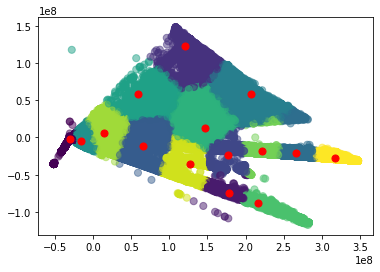

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()